# DNN手寫數字辨識

In [1]:
# 畫圖
import matplotlib.pyplot as plt
# 強化型list
import numpy as np
# 神經網絡模組
from tensorflow.keras.models import Sequential
# 分類物件
from tensorflow.keras.utils import to_categorical
# dense連接層(引入層數) activation激勵函式
from tensorflow.keras.layers import Dense, Activation

In [2]:
# mnist 手寫辨識資料集
from tensorflow.keras.datasets import mnist
# 優化器(梯型修正) Stochastic Gradient Descent
from tensorflow.keras.optimizers import SGD

In [3]:
# 將手寫辨識資料載入
# (訓練題目, 訓練答案), (測試題目, 測試答案)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# 六萬張, 寬, 高
x_train.shape

(60000, 28, 28)

In [5]:
len(x_train)

60000

In [6]:
len(x_test)

10000

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
y_train[0]

5

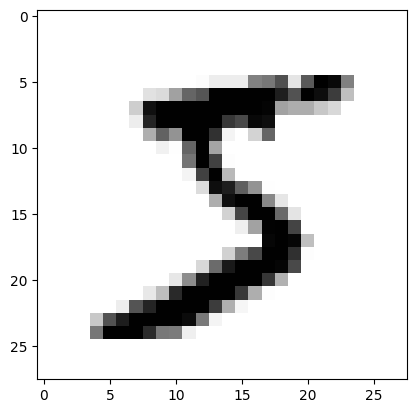

In [9]:
plt.imshow(x_train[0], cmap='binary')

In [10]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [11]:
# 改變大小(變成一個: 將六萬個寫在一個裡)
x_train = x_train.reshape(60000, -1)
x_test = x_test.reshape(10000, -1)

In [12]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [13]:
x_train.shape

(60000, 784)

## 資料整理

### 說明

In [14]:
n = np.arange(6)
print(n)

[0 1 2 3 4 5]


In [15]:
# 重新朔型(需與個數相符)
r = n.reshape((3,2))
r

array([[0, 1],
       [2, 3],
       [4, 5]])

### 收斂
當值太大的時候，需做收斂的動作

In [16]:
# 色階最大值255,除以255讓值收斂在0到1之間
x_train = x_train/255
x_test = x_test/255

In [17]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [18]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

#### OneHot
當答案正確寫1 => [0,0,0,0,0,1,0,0,0,0]

In [19]:
# 將答案分類(因為有0~9個，所以分10類)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [20]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## 建模

In [21]:
model = Sequential()

In [22]:
# 連接層(輸入層)add 神經元Dense 激勵函數relu, input_dim 圖片有幾個點(只有第一層要寫)
model.add(Dense(20, activation='relu', input_dim=784))

In [23]:
# 第二層(隱藏層) 神經元Dense 數字通常為上一層的倍數
model.add(Dense(40, activation='relu'))

In [24]:
# 第三層
model.add(Dense(80, activation='relu'))

In [25]:
# 輸出層 答案有10個 softmax 用於分類的激勵函式
model.add(Dense(10, activation='softmax'))

In [26]:
# 摘要
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 40)                840       
                                                                 
 dense_2 (Dense)             (None, 80)                3280      
                                                                 
 dense_3 (Dense)             (None, 10)                810       
                                                                 
Total params: 20630 (80.59 KB)
Trainable params: 20630 (80.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 神經元計算方式

神經元 20 * 784 + 自己的神經元 20 = 15700

上一層的神經元 20 * 自己的神經元 40 + 自己的神經元 40 = 840

上一層的神經元 40 * 自己的神經元 80 + 自己的神經元 80 = 3280

上一層的神經元 80 * 自己的神經元 10 + 自己的神經元 10 = 810

## 編譯(程式)

In [31]:
# optimizer='adam' 優化器
# loss 損失函式 ='mse' 平均方差
# metrics='accurancy' 只顯示正確度
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

## 訓練

In [32]:
# validation_batch_size 驗證率(放入多少做驗證)：當值越高，驗證越多，佔記憶體位置越大
# batch_size 每次驗證的數量
# epochs 回數
# 驗證並非一定要做
model.fit(x_train, y_train, validation_batch_size=0.2, batch_size=100, epochs=30)

Epoch 1/30
600/600 [==============================] - 2s 2ms/step - loss: 0.0203 - accuracy: 0.8578
Epoch 2/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0095 - accuracy: 0.9382
Epoch 3/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0078 - accuracy: 0.9495
Epoch 4/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0070 - accuracy: 0.9553
Epoch 5/30
600/600 [==============================] - 2s 4ms/step - loss: 0.0063 - accuracy: 0.9602
Epoch 6/30
600/600 [==============================] - 2s 4ms/step - loss: 0.0057 - accuracy: 0.9639
Epoch 7/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0055 - accuracy: 0.9648
Epoch 8/30
600/600 [==============================] - 2s 2ms/step - loss: 0.0052 - accuracy: 0.9671
Epoch 9/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0048 - accuracy: 0.9696
Epoch 10/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0047 - accuracy: 0.9707

## 預測

In [ ]:
predict = model.predict(x_test)

In [ ]:
predict[0]

In [ ]:
np.argmax(predict[0])

In [ ]:
y_test[0]